In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('pima-indians-diabetes.csv')

In [8]:
data.shape

(768, 9)

In [9]:
data.head()

Preg  Plas  Pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

In [10]:
data.isnull().values.any()

False

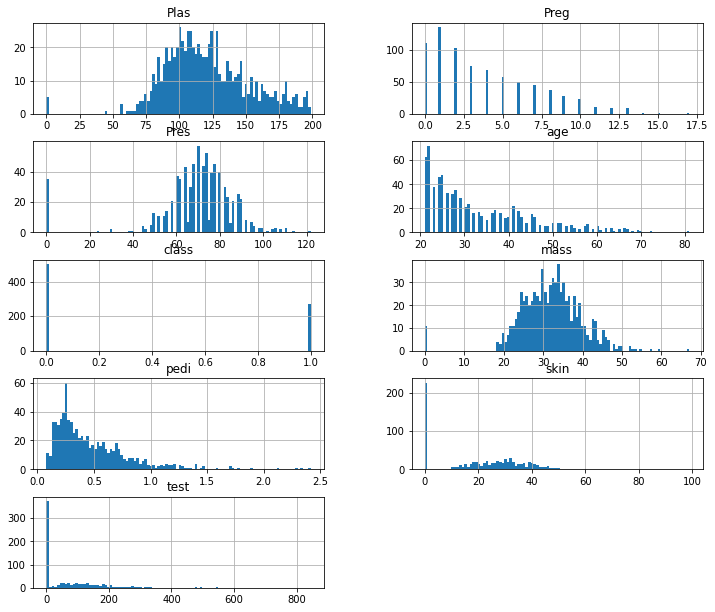

In [14]:
columns = list(data[0:-1])
data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

In [16]:
data.corr()

Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.129459  0.141282 -0.081672 -0.073535  0.017683 -0.033523   
Plas   0.129459  1.000000  0.152590  0.057328  0.331357  0.221071  0.137337   
Pres   0.141282  0.152590  1.000000  0.207371  0.088933  0.281805  0.041265   
skin  -0.081672  0.057328  0.207371  1.000000  0.436783  0.392573  0.183928   
test  -0.073535  0.331357  0.088933  0.436783  1.000000  0.197859  0.185071   
mass   0.017683  0.221071  0.281805  0.392573  0.197859  1.000000  0.140647   
pedi  -0.033523  0.137337  0.041265  0.183928  0.185071  0.140647  1.000000   
age    0.544341  0.263514  0.239528 -0.113970 -0.042163  0.036242  0.033561   
class  0.221898  0.466581  0.065068  0.074752  0.130548  0.292695  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.263514  0.466581  
Pres   0.239528  0.065068  
skin  -0.113970  0.074752  
test  -0.042163  0.130548  
mass   0.036242  0.292695  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [21]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)


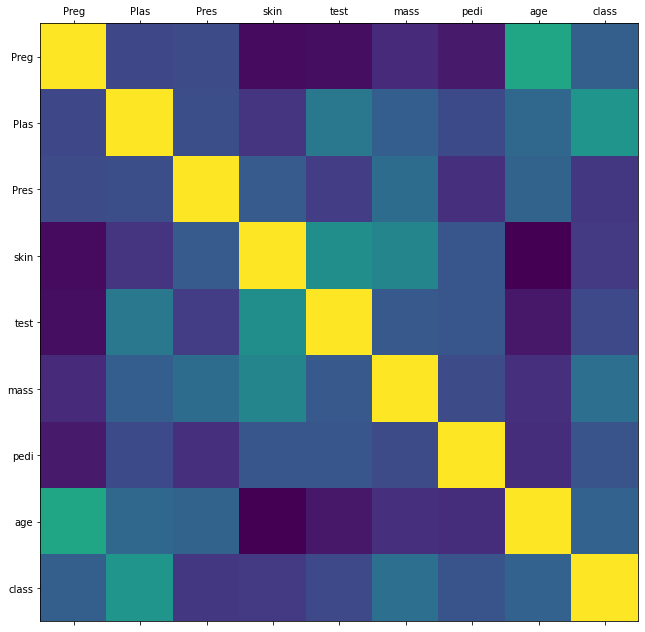

In [22]:
plot_corr(data)

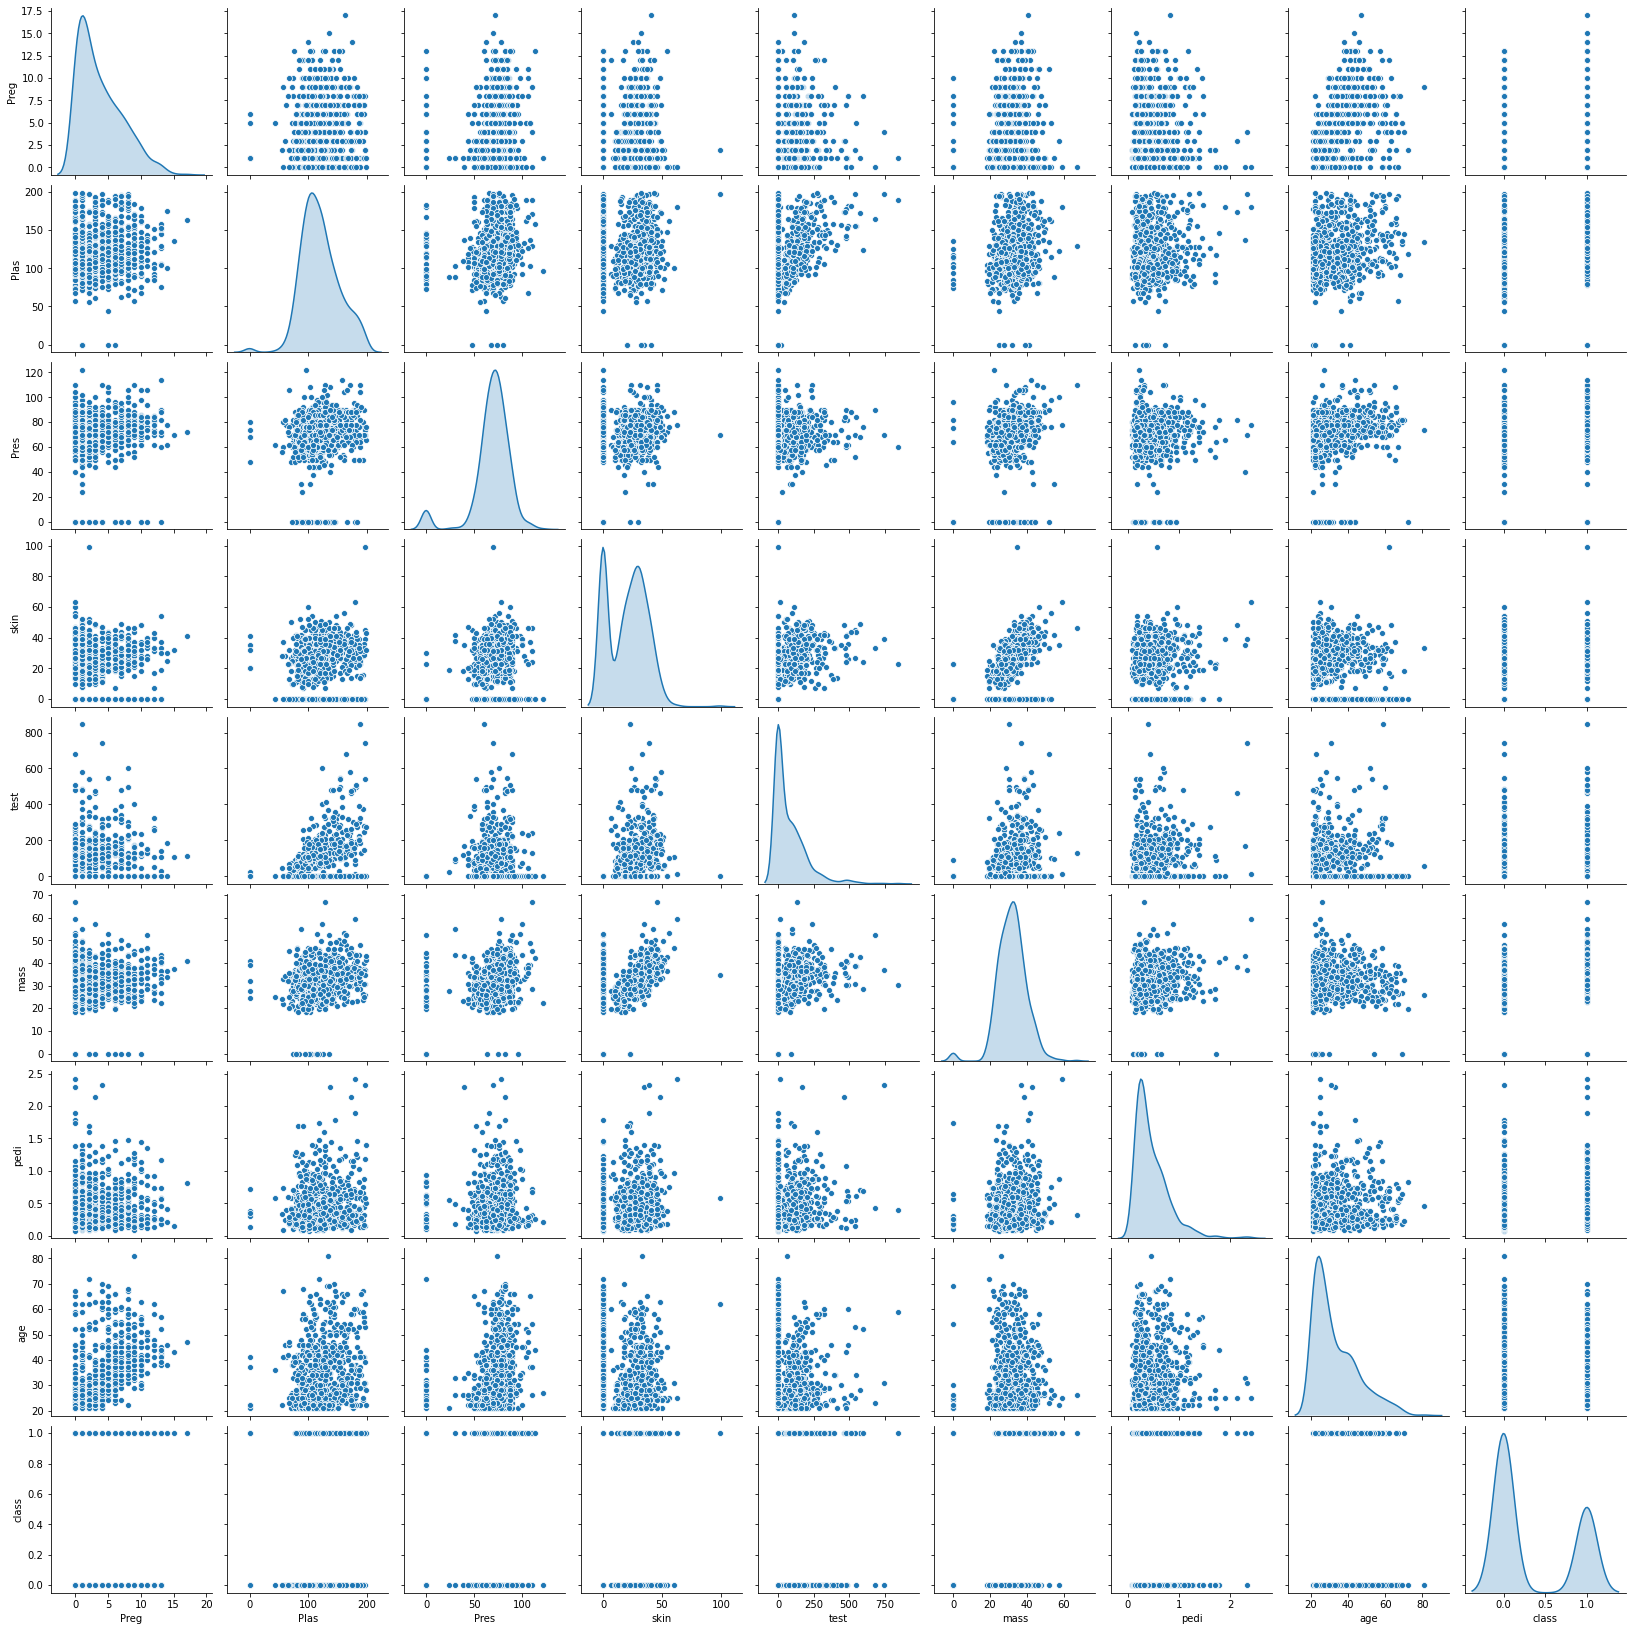

In [27]:
sns.pairplot(data, diag_kind='kde')

In [29]:
n_true = len(data.loc[data['class'] == True])
n_false = len(data.loc[data['class'] == False])
print(f'Total cases are diebetes in percentage {n_true/(n_true + n_false) * 100}')
print(f'Total cases are not diabetes i percentage {n_false/(n_true + n_false) * 100}')

Total cases are diebetes in percentage 34.89583333333333
Total cases are not diabetes i percentage 65.10416666666666


In [30]:
# splitting the data (70% for training and 30% for testing/validating)
from sklearn.model_selection import train_test_split
X = data.drop('class',axis=1)
Y = data['class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state=1)
x_train.head()

Preg  Plas  Pres  skin  test  mass   pedi  age
88     15   136    70    32   110  37.1  0.153   43
467     0    97    64    36   100  36.8  0.600   25
550     1   116    70    28     0  27.4  0.204   21
147     2   106    64    35   119  30.5  1.400   34
481     0   123    88    37     0  35.2  0.197   29

In [33]:
# Cleanup zero values with serial mean
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy='mean')
cols = x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols
x_train.head()


Preg   Plas  Pres  skin        test  mass   pedi   age
0  15.000000  136.0  70.0  32.0  110.000000  37.1  0.153  43.0
1   4.396514   97.0  64.0  36.0  100.000000  36.8  0.600  25.0
2   1.000000  116.0  70.0  28.0  158.243346  27.4  0.204  21.0
3   2.000000  106.0  64.0  35.0  119.000000  30.5  1.400  34.0
4   4.396514  123.0  88.0  37.0  158.243346  35.2  0.197  29.0

In [35]:
# lg model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
# predict on test
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

0         1         2         3         4         5         6  \
0  0.124458  0.026333 -0.029377 -0.012312 -0.000083  0.074111  0.347675   

          7  intercept  
0  0.012704  -4.983656  


In [36]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7792207792207793


[[ 48  37]
 [ 14 132]]


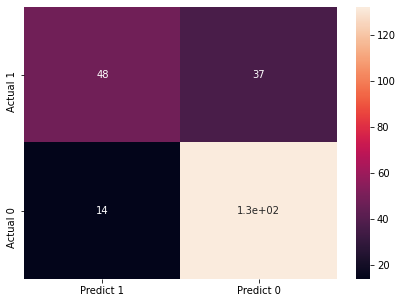

In [39]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index= [i for i in ["Actual 1", "Actual 0"]], columns= [i for i in ["Predict 1", "Predict 0"]])
print(cm)
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True)